### 1. Environment set-up

In [2]:
## Importing Libraries

# Set seed
import random
random.seed(1234)

# Manipulating and Vizualizing Data
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})

# Sampling Methods
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# Train/Test Split
from sklearn.model_selection import train_test_split

# Cross Validation
from sklearn.model_selection import cross_val_score, KFold

# Dimensionality Reduction
from sklearn.decomposition import PCA, TruncatedSVD
#from sklearn.da import LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Simple ML Models
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Ensemble Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier


# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Performance metrics
import sklearn.metrics as skm

In [3]:
## Loading the dataset
df = pd.read_csv(r"C:\Users\hp\Desktop\creditcard.csv")

### 2. Initial Diagnostics 

In [4]:
## Initial presentation of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Descriptive Statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Takeaway**: The following percentage confirms that we have a considerable class imbalance with the target varibale. It stays consistent that most fraudlent activities are much less frequent than non-fraudlent. Before proceeding, we shall note it to avoid any overfitting issues when fitting the machine learning models.

In [6]:
# Target Variable Analysis
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

**Takeaway**: We did not have any information on the numerical predictors for privacy. given their transformation and standardization, excluding Amount and Time. In that regard, Amount presented itself as potentially most informative for the feature variable analysis. To better understand the variable's distribution, we had to transform it using a log scale.

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


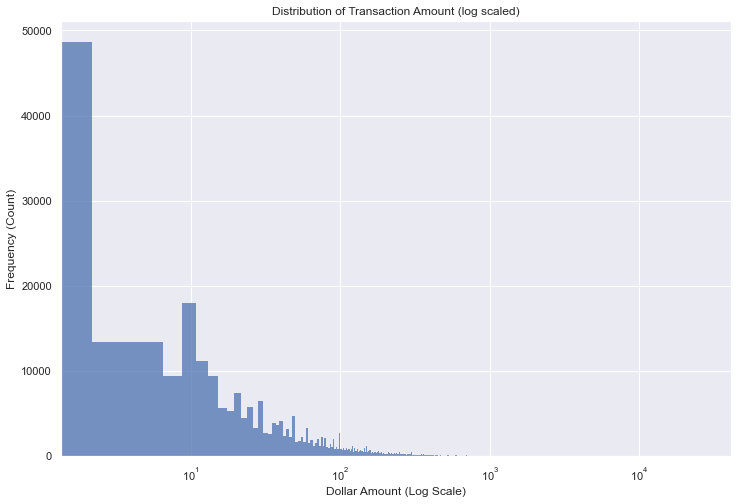

In [7]:
## Feature Variable Analysis

# Basic statistics
print(df['Amount'].describe())

# Distribution
sns.histplot(data=df, x='Amount').set(xscale="log")
plt.xlabel("Dollar Amount (Log Scale)")
plt.ylabel("Frequency (Count)")
plt.title("Distribution of Transaction Amount (log scaled)")
plt.show()

### 3. Data Cleaning

There are  0 null/na values in the dataset


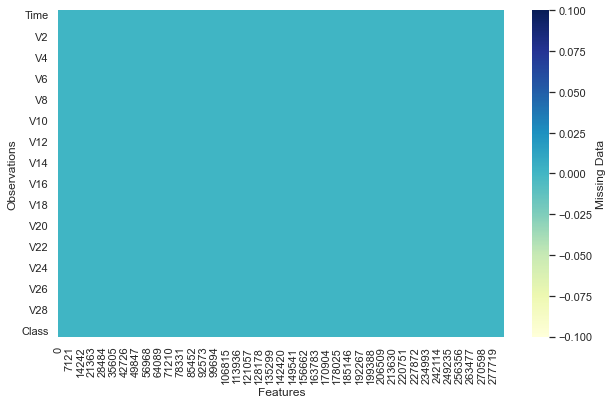

In [8]:
# Missing Values
print("There are %2d null/na values in the dataset" %df.isna().sum().sum())

plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
           cmap="YlGnBu",
           cbar_kws={'label': 'Missing Data'})
plt.xlabel("Features")
plt.ylabel("Observations")
plt.show()

**Takeaway**: As the plot shows above, we have no missing values given the pre-processing done prior.

**Note**: With most predictors transformed, there will be a little chance for any outliers in the data points V1, V2,..., V28. So, we will only examine Amount as the only meaningful numeric feature.

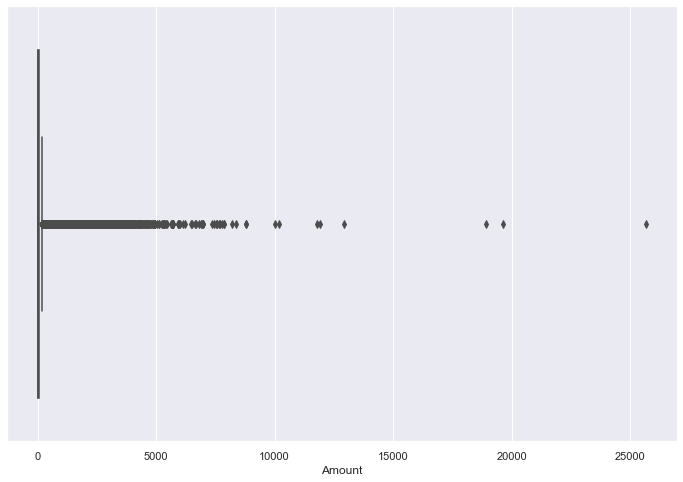

In [9]:
## Outliers
sns.boxplot(data=df, x='Amount')
plt.show()

**Note**: From the boxplot above, we can observe a non-negligible number of outliers on the upper end of the distribution. It would denote transactions with high amounts in the order of thousands of dollars. We would assess the effect of this skewed distribution when building the predective models in terms of feature transformation or selecting models robust to such feature types.

In [10]:
## Duplicate Observations

# No. of duplicate rows
df.duplicated().value_counts()

False    283726
True       1081
dtype: int64

**Takeaway**: A quick check reveals 1081 duplicate rows, so we proceed in removing them from the dataset.

In [11]:
df.drop_duplicates(keep='last', inplace=True)

**Definition**: Feature Engineering

In [12]:
# Feature Engineering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

### 4. Correlation Analysis

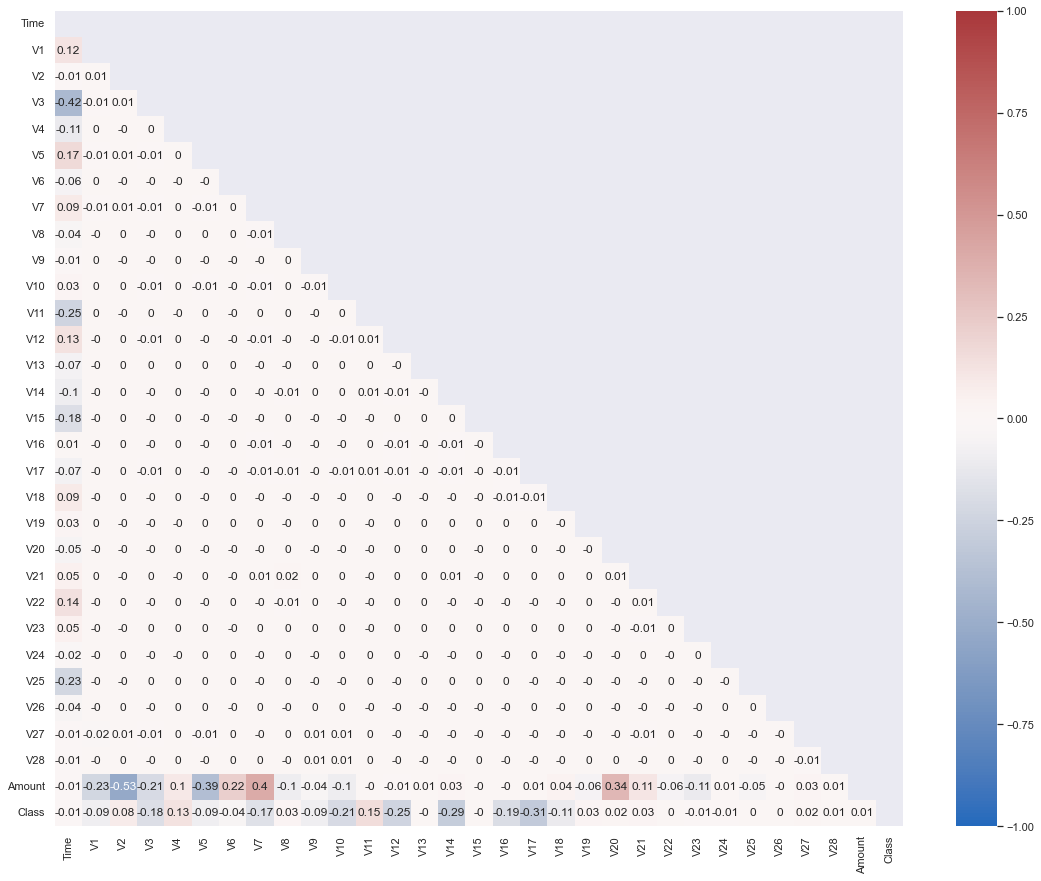

In [13]:
# Correlation Matrix
f = plt.figure(figsize=(19, 15))
matrix = df.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

**Takeaway**: From the correlation matrix plotted, we can observe very few correlated variables as we would expect after the feature transformation. The two meaningful features, are Time and Amount, have some relative correlation with some variables with coefficients approximating 0.4. With such low values, it would be pretty challenging to imply a correlation between any of them with any certainty. It also indicates that there would be a very low incidence of any colinearity within our data.

**Note**: The code below filters those pairs with correlation coefficients above 0.5 as a threshold. As noted above, those values give very little to no confidence in any correlated relationship  between variables as few crossing the 0.5 mark.

In [14]:
# Filtering those with some significant correlation coefficients
matrix = df.corr()
matrix = matrix.unstack()
matrix = matrix[abs(matrix) >= 0.5]

print(matrix)

Time    Time      1.000000
V1      V1        1.000000
V2      V2        1.000000
        Amount   -0.533428
V3      V3        1.000000
V4      V4        1.000000
V5      V5        1.000000
V6      V6        1.000000
V7      V7        1.000000
V8      V8        1.000000
V9      V9        1.000000
V10     V10       1.000000
V11     V11       1.000000
V12     V12       1.000000
V13     V13       1.000000
V14     V14       1.000000
V15     V15       1.000000
V16     V16       1.000000
V17     V17       1.000000
V18     V18       1.000000
V19     V19       1.000000
V20     V20       1.000000
V21     V21       1.000000
V22     V22       1.000000
V23     V23       1.000000
V24     V24       1.000000
V25     V25       1.000000
V26     V26       1.000000
V27     V27       1.000000
V28     V28       1.000000
Amount  V2       -0.533428
        Amount    1.000000
Class   Class     1.000000
dtype: float64


### 5. Inquiry Exploration

**Note**: In an attempt to answer the first question, we first split our dataset by class types; in other words, fraudlent and non-fraudlent transactions. We then plot the histogram side by side to observe any unusual behavior. In doing so, the non-fraud transactions were havily right-skewed, making it quite challenging to compare the plots. To solve this issue, we used a logarithmic transformation, making it easier to see and thus, evaluate any similarities and differences.

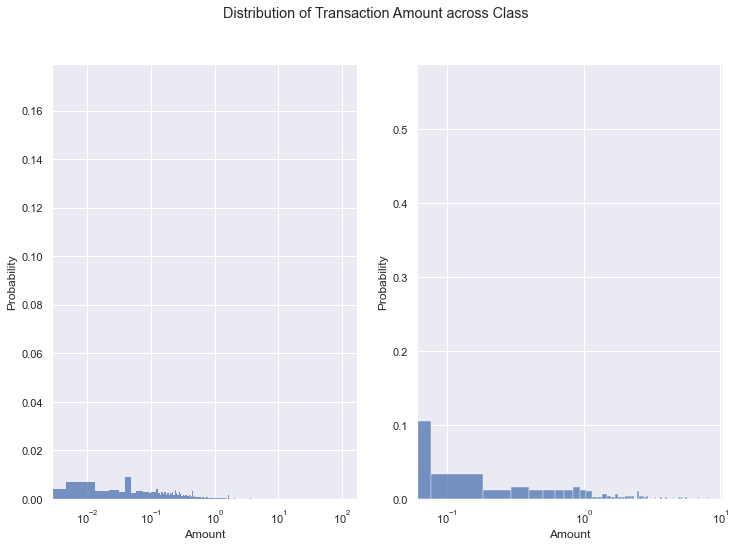

In [15]:
# How does Amount's distribution behaves across classes?

# Splitting data by fraud class
df_no_fraud = df[df['Class'] == 0]
df_fraud = df[df['Class'] == 1]

# Histogram for Amount Distribution per class
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
fig.suptitle('Distribution of Transaction Amount across Class')
sns.histplot(ax=ax1, data=df_no_fraud, x='Amount', stat='probability').set(xscale='log')
sns.histplot(ax=ax2, data=df_fraud, x='Amount', stat='probability').set(xscale='log')
plt.show()

**Takeaway**: Before making a note on plots, we will first explain how to interpret logarithmic scales. In short, log scales show relative values rather than absolute ones. Indeed, 2 minus 1 would be displayed similarly to 9999 minus 9998, given that we are dealing with percentages here. In context, the histograms above would depict the order of growth of transaction value. Both distributions represent a similar trajectory, with most transactions on the lower end of the graph. It stays consistent with the mean value found at USD 88, even with max values averaging USD 20,000.

**Note**: For the second question, we will check the timing of transactions to detect anything unusual. We will use only the fraud dataset and plot a scatterplot accordingly.

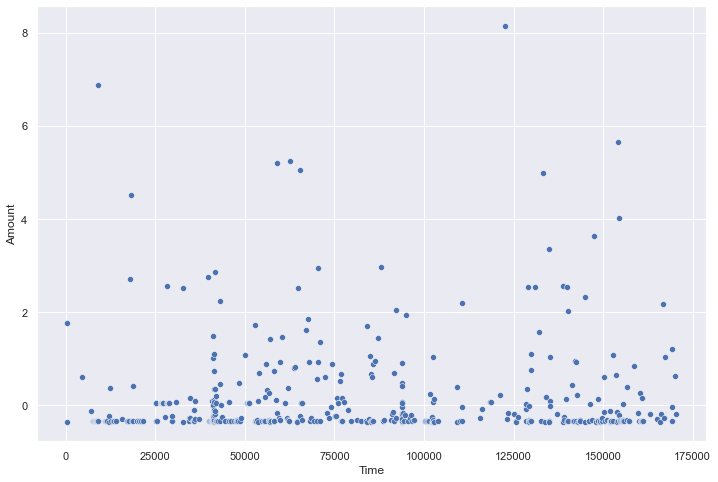

In [16]:
## Are there any noteworthy point in time where fraud occured?
# Scatterplot
sns.scatterplot(data=df_fraud, x='Time', y='Amount')
plt.show()

**Takeaway**: The graph above does not appear that there is a clustering pattern on a time interval. So, we would assume that fraud occurred across time quite randomly.

### 6. Class Imbalance

**Note**: Our diagnostics observed a significant imbalance between classes of transactions, with fraud only making up 0.2% of all transaction statuses. Given the limited pool of examples to train, it poses an issue in terms of building an effective machine learning model to predict if there is a fraud. With the minority class being so small, we would expect poor performance on the critical task of detecting fraud transactions. In that vein, we wil use different sampling methods (Undersampling and Oversampling) to tackle this problem.

In [17]:
# Splitting features and target variable
X = df.drop(['Class'], axis=1)
y = df['Class']

**Definition**: SMOTE (Synthetic Minority Oversampling Technique) is an oversamplig approach to the minority class. In contex, it would mean to randomly increase fraud examples by "artificially" replicating to have a more balanced class distribution. Further information [here](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/).

In [18]:
## SMOTE
oversample = SMOTE()
X_sm, y_sm = oversample.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (283726, 30)
Shape of X after SMOTE: (566506, 30)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: Class, dtype: float64

**Definition**: Near-Miss Algorithm is an undersampling approach on the majority class. In context, we select examples to keep out of the training set based on the distance of majority class examples to minority class examples. Further information [here](https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/).

In [19]:
## Near Miss Algorithm
nr = NearMiss()

X_nmiss, y_nmiss = nr.fit_resample(X, y)

print(f'''Shape of X before Near Miss Algorithm: {X.shape}
Shape of X after Near Miss Algorithm: {X_nmiss.shape}''')

print('\nBalance of positive and negative classes (%):')
y_nmiss.value_counts(normalize=True) * 100

Shape of X before Near Miss Algorithm: (283726, 30)
Shape of X after Near Miss Algorithm: (946, 30)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: Class, dtype: float64

**Note**: With the risk of overfitting with oversampling and the possibility to lose valuable information from undersampling, we will also consider combining both to rebalance the distribution. So, we shall proceed with the combination taking out the risks we identified.

In [20]:
## Combined Random Smapler
over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)

# Oversampling minority class
X_over, y_over = over.fit_resample(X, y)

# Combine with under sampling
X_combined_sampling, y_combined_sampling = under.fit_resample(X_over, y_over)
print(f'''Shape of X before Combined Random Sampler: {X.shape}
Shape of X after Combined Random Sampler: {X_combined_sampling.shape}''')

print('\nBalance of positive and negative classes (%):')
y_combined_sampling.value_counts(normalize=True) * 100

Shape of X before Combined Random Sampler: (283726, 30)
Shape of X after Combined Random Sampler: (318658, 30)

Balance of positive and negative classes (%):


0    55.555486
1    44.444514
Name: Class, dtype: float64

In [21]:
# Defined the final features and target
X_final, y_final = X_combined_sampling, y_combined_sampling

### 7. Machine Learning set-up

Under this section, we will explain the procedure of two main splitting approach to estimate our models' performance.

**Definition**: Often denoted as the most popular by its simplicity, the train-test split is a sampling technique dividing the dataset between training and testing sets. In doing so, the goal would be to have enough in our training set used for the machine learning to predict the observations in the testing set as accurately as possible. Most would opt for a 70/30 split, respectively, other 80/20, 60/40, or whichever works best for the specific scenario.

In [22]:
## Training Testing Split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final,
                                                    test_size=0.3,
                                                    random_state=42)

clf = LogisticRegression(max_iter=1000, solver='liblinear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
skm.average_precision_score(y_test, y_pred)

0.9093870372978503

**Definition**: As the name would suggest, we will engage here in the process of validation to ensure reliability on our model. Cross-Validation is a statistical method applied in various mays to estimate the model's performance. Some examples are Houldout Method, K-Fold, Stratified K-Fold, Leave-P-Out. Further information [here](https://towardsdatascience.com/cross-validation-in-machine-learning-72924a69872f)

**Note**:As we already tackled the issue of class imbalance with a combination of under- and over- fitting, we will use the K-Fold Cross-Validation.

In [23]:
## Cross-Validation
scores = cross_val_score(LogisticRegression(max_iter=1000, solver='liblinear'), X_train, y_train,
                        cv=3, scoring='average_precision')

print('Average Precision Score: %.3f (%.4f)' % (np.mean(scores), 
                                                np.std(scores)))

Average Precision Score: 0.960 (0.0055)


**Takeaway**:
As we advance, we would opt for the cross-validation testing procedure in model performance evaluation.

### 8. Dimensionality Reduction

This section will use dimensionality reduction to trim down the number of features we have. Dimensionality reduction encapsulates the techniques reducing the input variables in our training data. In doing so, we hope to have a more straightforward but effective machine learning model structure and avoid any potential case of overfitting. We will be testing three different methods from Linear Algebra: PCA, SVD, and LDA and pick the one capturing the most variability in the datasets after reducing it to principal components.

**Definition**: PCA (Principal Component Analysis) takes data with m-columns projected to a subspace with n-features (n < m) while preserving the crucial information from the original data; in other words, PCA attempts to find the **principal components (or features)** as its names denotes.

In [24]:
## Principal Component Analysis
pca = PCA(n_components = 2)
pca.fit_transform(X_final)
np.sum(pca.explained_variance_ratio_)

0.9999999651142302

**Definition**: SVD (Singular Value Decomposition) is a process breaking down a matrix into its constituents elements by factorizing it into three separate matrices: **M=UΣVᵗ**.
- M: original matrix
- U: left singular matrix (columns are left singular vectors) containing eigenvectors of matrix MMᵗ
- Σ: a diagonal matrix containing singular (eigen)values
- V: right singuar matrix (columns are right singular vectors) cotaining eigenvectors of matrix MᵗM

Further information [here](https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/).

In [25]:
## Singular Value Decomposition
svd = TruncatedSVD(n_components=2)
svd.fit_transform(X_final)
np.sum(svd.explained_variance_ratio_)

0.999999964740791

**Definition**: LDA (Linear Discriminant Analysis) seeks to separate class type samples within the training set by finding a linear combination of input variables. The LDA algorithms take roots in matrix factorization, a core concept in Linear Algebra. Further information [here](https://machinelearningmastery.com/linear-discriminant-analysis-for-dimensionality-reduction-in-python/) .

In [27]:
## Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit_transform(X_final, y_final)
np.sum(lda.explained_variance_ratio_)

1.0

**Takeaway**: We will proceed by using LDA as it captures the entire variation (100%) in the dataset.

In [30]:
X_lda = lda.fit_transform(X_final, y_final)

## Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_lda, y_final,
                                                    test_size=0.3,
                                                    random_state=42)

### 9. Machine Learning - Simple Models

This section will leverage the powerful sci-kit-learn package to build multiple models with little to no parameter tuning for comparision. We will only use the cross-validation error on our training set to avoid any data leakage.

In [31]:
# Dictionary to store model structures
models = dict()

**Definition**: Logistic Regression is a predective classifier that models an S-shaped curve (Sigmoid function) on the data to label the examples. Further information [here](https://machinelearningmastery.com/logistic-regression-for-machine-learning/).

In [32]:
## Logistic Regression
logreg = LogisticRegression()
models.update({'Logistic Regression':logreg})

**Definition**: k-Nearest Neighbors in a machine learning model build on Euclidean distance that categorizes the observations. Further information [here](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761).

In [33]:
## k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=2)
models.update({'k-Nearest Neighbors': knn})

**Definition**:Stochastic Gradient Descent is an iterative algorithm that minimizes the model's error rate. Further information [here](https://towardsdatascience.com/stochastic-gradient-descent-clearly-explained-53d239905d31).

In [34]:
sgd = SGDClassifier()
models.update({'Stochastic Gradient Descent': sgd})

**Definition**: A Decision Tree is a supervised machine learning algorithm building an actual tree based on splits within the data. Further information [here](https://towardsdatascience.com/decision-tree-in-machine-learning-e380942a4c96).

In [35]:
## Decision Tree
tree = DecisionTreeClassifier()
models.update({'Decision Tree': tree})

In [36]:
# Checking the dictionary of models
models

{'Logistic Regression': LogisticRegression(),
 'k-Nearest Neighbors': KNeighborsClassifier(n_neighbors=2),
 'Stochastic Gradient Descent': SGDClassifier(),
 'Decision Tree': DecisionTreeClassifier()}

In [38]:
# Cross-Validation & model building
for name, model in models.items():
    n_scores = cross_val_score(model, X_train, y_train, 
                                cv=3, scoring='average_precision')
    # report performance
    print('{} - Average Precision Score: {:.5f} ({:.5f})' .format(name, np.mean(n_scores), 
                                                                  np.std(n_scores)))

Logistic Regression - Average Precision Score: 0.97437 (0.00039)
k-Nearest Neighbors - Average Precision Score: 0.99608 (0.00039)
Stochastic Gradient Descent - Average Precision Score: 0.97437 (0.00039)
Decision Tree - Average Precision Score: 0.99608 (0.00039)


**Takeaway**: Our two best models are k-NN and Decision Tree with both approximately 99.7% AUPRC.

### 10. Machine Learning - Ensemble Methods

This section will extend our work in machine learning to incorporate ensemble methods. We generated simple models and compared the scores, which appear satisfactory, with the lowest at 0.974 for the Average Precision Score. However, we may want more stability and minor variation in our predictive algorithm; it is where ensemble techniques come in. Most often, they act as a 'superposer' of multiple models throughout various ways and thus, reinforce their predictive power. Further information [here](https://machinelearningmastery.com/tour-of-ensemble-learning-algorithms/).

In [39]:
# Dictionary to store ensemble model structures
ensemble_models = dict()

**Definition**: Random Forest builds onto the logic of decision tree by agglomerating multiple trees and obtaining a given prediction from majority voting; in other words, it is a Decision Tree times n (number of trees). Further information [here](https://towardsdatascience.com/understanding-random-forest-58381e0602d2).

In [40]:
## Random Forest
rf_clf = RandomForestClassifier()
ensemble_models.update({'Random Forest': rf_clf})

**Definition**: Stochastic Gradient Boosting is part of the more sophisticated ensemble techniques (Boosting), learning from previous models' errors and building a sequential imporvement process. Further information. [here](https://towardsdatascience.com/understanding-random-forest-58381e0602d2).

In [41]:
## Stochastic Gradient Boosting
boost_clf = GradientBoostingClassifier()
ensemble_models.update({'Stochastic Gradient Boosting': boost_clf})

**Definition**: Stacking Classifier creates a meta-model based on individual models to improve performance, though not always so in ll cases. In our instance, we will use all simple models. Further information [here](https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/).

In [44]:
## Stacking Classifier
estimators = [
    ('logreg', LogisticRegression()),
    ('knn', KNeighborsClassifier()),
    ('sdg', SGDClassifier()),
    
]
stack_clf = StackingClassifier(estimators = estimators,
                               final_estimator = DecisionTreeClassifier())
ensemble_models.update({'Stacking Classifier': stack_clf})

In [45]:
# Check dictionary of ensemble models
ensemble_models

{'Random Forest': RandomForestClassifier(),
 'Stochastic Gradient Boosting': GradientBoostingClassifier(),
 'Stacking Classifier': StackingClassifier(estimators=[('logreg', LogisticRegression()),
                                ('knn', KNeighborsClassifier()),
                                ('sdg', SGDClassifier())],
                    final_estimator=DecisionTreeClassifier())}

In [48]:
# Cross-Validation and model building
for name, model in ensemble_models.items():
    n_scores = cross_val_score(model, X_train, y_train,
                                cv=3, scoring='average_precision')
    # report performance
    print('{} - Average Precision Score: {:.5f} ({:.5f})' .format(name, np.mean(n_scores),
                                                                        np.std(n_scores)))

Random Forest - Average Precision Score: 0.99608 (0.00039)
Stochastic Gradient Boosting - Average Precision Score: 0.98906 (0.00072)
Stacking Classifier - Average Precision Score: 0.94466 (0.01731)


**Takeaway**: Based on the numbers obtained, the Random Forest model was equal with the two best individual models, K-Nearest Neighbors and Decision Tree. The Stochastic Gradient Boosting outperformed Logistic Regression and Stochastic Gradient Descent. In contrast, the stacking model was worse than all of the above.

### 11. Hyperparameter Tuning

This section will walk through a process to find the best possible models given a set of parameters. In machine learning, we name it hyperparameter tuning during which the algorithm search for the set of optimal hyperparameters driving the metric as high (or low, depending the case scenario) as possible.

In [49]:
## Random Search

# define search space
knn_space = {
    'weights': ['uniform', 'distance'],
    'metric': ['euclidian', 'manhattan', 'minkowski']
}

tree_space = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

In [51]:
# The top 3 models
top_models = {
    'k-Nearest Neighbors': [knn, knn_space],
    'Decision Tree Classifier': [tree, tree_space]
}
top_models

{'k-Nearest Neighbors': [KNeighborsClassifier(n_neighbors=2),
  {'weights': ['uniform', 'distance'],
   'metric': ['euclidian', 'manhattan', 'minkowski']}],
 'Decision Tree Classifier': [DecisionTreeClassifier(),
  {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random']}]}

**Definition**: Grid Search will define its search space as a grid and evaluate every position inside the grid. Further information [here](https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/).

In [53]:
for name, specs in top_models.items():
    model, space = specs[0], specs[1]
    search = GridSearchCV(estimator=model, param_grid=space, 
                          cv=2, scoring='average_precision')
    search.fit(X_train, y_train)
    print('{} - Average Precision Score: {:.5f}' .format(name, search.best_score_))
    print('with best parameters: {}.\n' .format(search.best_params_))

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 342, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'euclidian' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.



k-Nearest Neighbors - Average Precision Score: 0.99529
with best parameters: {'metric': 'manhattan', 'weights': 'uniform'}.

Decision Tree Classifier - Average Precision Score: 0.99529
with best parameters: {'criterion': 'gini', 'splitter': 'best'}.



**Definition**: Random Search will define its search space as limited domain and randomly select sample points to test and do so recursively. Further information [here](https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/).

In [62]:
for name, specs in top_models.items():
    model, space = specs[0], specs[1]
    search = RandomizedSearchCV(estimator=model, param_distributions=space, 
                                cv=2, n_iter=2, scoring='average_precision')
    search.fit(X_train, y_train)
    print('{} - Average Precision Score: {:.5f}' .format(name, search.best_score_))
    print('with best parameters: {}.\n' .format(search.best_params_))

k-Nearest Neighbors - Average Precision Score: 0.99529
with best parameters: {'weights': 'uniform', 'metric': 'manhattan'}.

Decision Tree Classifier - Average Precision Score: 0.99529
with best parameters: {'splitter': 'best', 'criterion': 'entropy'}.



**Takeway**: Though both models produce quite similar AUPRC, we will opt for the Decision Tree Classifier having the highest value during the hyperparameter tuning.

### 12. Model Performance Evaluation

This section will build on everything we've done throughout this notebook and evaluate the best model using AUPRC.

**Definition**: AUPRC (Area Under the Precision-Recall Curve) focuses on finding the positive examples; in other words, the fraudlent transactions in our case. Further information [here](https://glassboxmedicine.com/2019/03/02/measuring-performance-auprc/).

In [63]:
# Running on testing set
tree = DecisionTreeClassifier(splitter='best', criterion='gini')
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

# report performance
print('Decision Tree Classifier - AUPRC: {:.5F}' .format(skm.average_precision_score(y_test, y_pred)))

Decision Tree Classifier - AUPRC: 0.99729


**Conclusion**: Given its simple implementation and recurrent high performance, we will present the Decision Tree Classifier as our final model.